In [ ]:
# What is a Support Vector Machine (SVM)?

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that best separates the data into different classes.

### Key Concepts:
- **Hyperplane**: A decision boundary that separates different classes.
- **Support Vectors**: Data points that are closest to the hyperplane. These points influence the position and orientation of the hyperplane.
- **Margin**: The distance between the hyperplane and the nearest data points from either class. SVM aims to maximize this margin.

### Types of SVM:
- **Linear SVM**: Used when the data is linearly separable.
- **Non-Linear SVM**: Uses kernel tricks (like RBF, polynomial) to separate data that is not linearly separable.

### Advantages:
- Effective in high-dimensional spaces.
- Works well with a clear margin of separation.
- Versatile with different kernel functions.

### Disadvantages:
- Not suitable for very large datasets due to high training time.
- Less effective when classes overlap significantly.

### Applications:
- Image classification
- Text categorization
- Handwriting recognition
- Bioinformatics

In [ ]:
#  What is the difference between Hard Margin and Soft Margin SVM?

Support Vector Machines (SVMs) can be implemented using either a **Hard Margin** or a **Soft Margin**, depending on the type of data (linearly separable or not).

### Hard Margin SVM
- Assumes the data is **perfectly linearly separable**.
- Finds a hyperplane that separates the classes **without any misclassification**.
- Maximizes the **margin** between the classes.
- Very **sensitive to outliers** — even a single noisy data point can make it impossible to find a separating hyperplane.

#### Pros:
- Simple and fast when data is clean and linearly separable.

#### Cons:
- Not robust to noise or overlapping classes.

### Soft Margin SVM
- Used when data is **not perfectly separable**.
- Allows **some misclassification** by introducing a penalty using **slack variables**.
- Controls the trade-off between maximizing the margin and minimizing classification error using a **regularization parameter C**.

#### Pros:
- **Robust to noise and outliers**.
- Works better in real-world scenarios where perfect separation is rare.

#### Cons:
- Requires tuning of the parameter **C** to balance margin size and error rate.

In [ ]:
#   What is the mathematical intuition behind SVM?

Support Vector Machine (SVM) is based on the concept of **maximizing the margin** between two classes in a dataset. It finds the best decision boundary (called a hyperplane) that separates the classes with the **maximum possible margin**.

###  Linear SVM

Given training data:
\[
(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)
\]
Where:
- \( x_i \in \mathbb{R}^n \)
- \( y_i \in \{-1, +1\} \)

SVM aims to find a hyperplane:
\[
w^T x + b = 0
\]
Where:
- \( w \) is the weight vector (normal to the hyperplane)
- \( b \) is the bias (offset from the origin)

### Classification Constraint

To correctly classify the data points:
\[
y_i(w^T x_i + b) \geq 1 \quad \forall i
\]

### 🎯 Optimization Objective

The margin (distance between the hyperplane and the closest data point) is given by:
\[
\text{Margin} = \frac{2}{\|w\|}
\]

To **maximize the margin**, we **minimize**:
\[
\min_{w, b} \frac{1}{2} \|w\|^2 \quad \text{subject to } y_i(w^T x_i + b) \geq 1
\]


### Soft Margin SVM (for noisy data)

In real-world data, perfect separation may not be possible. To allow some misclassification, **slack variables** \( \xi_i \geq 0 \) are introduced:
\[
y_i(w^T x_i + b) \geq 1 - \xi_i
\]

New objective:
\[
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i
\]
Where \( C \) is a regularization parameter that controls the trade-off between margin width and classification error.

### Non-Linear SVM: Kernel Trick

For non-linearly separable data, SVM uses a **kernel function** to map data into a higher-dimensional space.

Popular kernels:
- Linear: \( K(x, x') = x^T x' \)
- Polynomial: \( K(x, x') = (x^T x' + c)^d \)
- RBF: \( K(x, x') = \exp(-\gamma \|x - x'\|^2) \)

This makes it possible to find a linear separator in the transformed space.

In [ ]:
#   What is the role of Lagrange Multipliers in SVM?

Lagrange multipliers are used in SVM to solve the optimization problem that involves constraints.

## Background: Constrained Optimization

Support Vector Machine (SVM) tries to solve the following primal optimization problem:

minimize (1/2) * ||w||^2
subject to: y_i (w^T x_i + b) ≥ 1 for all i

This is a convex optimization problem with inequality constraints. To solve it, we use the method of Lagrange multipliers.

## Constructing the Lagrangian

Introduce a Lagrange multiplier alpha_i ≥ 0 for each constraint:

L(w, b, alpha) = (1/2) * ||w||^2 - sum over i [alpha_i * (y_i(w^T x_i + b) - 1)]

## Dual Formulation

To simplify the solution, we move to the dual formulation by:

- Minimizing the Lagrangian with respect to w and b
- Maximizing it with respect to alpha

This gives the dual optimization problem:

maximize:
sum over i (alpha_i) - (1/2) * sum over i,j (alpha_i * alpha_j * y_i * y_j * x_i^T * x_j)

subject to:
alpha_i ≥ 0
sum over i (alpha_i * y_i) = 0

## Why Use the Dual Problem

- It simplifies computation when the number of features is high
- It allows the use of kernel functions for non-linear classification


## Role of Lagrange Multipliers (alpha_i)

- Only a few alpha_i will be non-zero. These correspond to the support vectors
- Support vectors are the critical data points that define the decision boundary
- Once alpha_i are known, the optimal hyperplane can be computed as:

w = sum over i (alpha_i * y_i * x_i)

The decision function becomes:

f(x) = sum over i (alpha_i * y_i * K(x_i, x)) + b

In [ ]:
# What are Support Vectors in SVM?

Support vectors are the data points that lie closest to the decision boundary (hyperplane) in a Support Vector Machine (SVM) model. These points are the most important elements of the training set because they directly influence the position and orientation of the hyperplane.


## Explanation

In SVM, the goal is to find the optimal hyperplane that separates the data into different classes with the maximum margin. The margin is the distance between the hyperplane and the nearest data points from each class. The data points that lie exactly on the edge of this margin are called support vectors.

Only these points are used in defining the hyperplane, and any other data points that lie outside the margin do not affect the final model.

## Characteristics of Support Vectors

- They are the **critical elements** of the training dataset
- They lie on or inside the margin boundaries
- They are the only points that have non-zero Lagrange multipliers (alpha > 0)
- Removing a support vector can change the decision boundary
- The model complexity depends on the number of support vectors, not the total number of data points

## Role in Decision Function

Once the SVM model is trained, the decision function is defined using only the support vectors:

f(x) = sum over i (alpha_i * y_i * K(x_i, x)) + b

Where:
- alpha_i are Lagrange multipliers
- y_i are class labels
- x_i are support vectors
- K(x_i, x) is the kernel function
- b is the bias term

In [ ]:
# What is a Support Vector Regressor (SVR)?

Support Vector Regressor (SVR) is an extension of Support Vector Machine (SVM) for regression problems. Unlike classification SVM, which finds a hyperplane to separate classes, SVR tries to fit a function that approximates the target values as accurately as possible within a specified error margin.

## Goal of SVR

SVR aims to find a function f(x) that has at most epsilon (ε) deviation from the actual target values for all training data, and at the same time, is as flat as possible.

## Mathematical Formulation

Given training data:
(x1, y1), (x2, y2), ..., (xn, yn)

SVR tries to find a function of the form:

f(x) = w^T x + b

Subject to the condition:

|y_i - f(x_i)| ≤ ε for all i

To allow for errors beyond ε (in case the data is noisy), slack variables ξ_i and ξ_i* are introduced.

## Optimization Objective

Minimize:

(1/2) * ||w||^2 + C * sum over i (ξ_i + ξ_i*)

Subject to:

y_i - w^T x_i - b ≤ ε + ξ_i
w^T x_i + b - y_i ≤ ε + ξ_i*
ξ_i, ξ_i* ≥ 0

Here:
- ||w||^2 is used to keep the function flat
- C is the regularization parameter
- ε defines the margin of tolerance
- ξ_i and ξ_i* are slack variables for deviations above and below ε


## Kernel Trick

Like SVM, SVR can also use the kernel trick to handle non-linear regression. Common kernels include:
- Linear kernel
- Polynomial kernel
- Radial Basis Function (RBF) kernel

This allows SVR to model complex non-linear relationships between input and output.

In [ ]:
#  What is the effect of the C parameter in SVM?

The parameter **C** in Support Vector Machine (SVM) controls the trade-off between achieving a low training error and maintaining a large margin (model simplicity).

## Role of C

- **C** is a regularization parameter that penalizes misclassification or errors on the training data.
- A **small value** of C makes the margin **wider** but allows more misclassifications (soft margin). This encourages a simpler model that may generalize better.
- A **large value** of C tries to classify all training points correctly by giving higher penalty to misclassification. This results in a **narrower margin** and may cause overfitting.

## Intuition

- When **C is large**:
  The model tries to minimize classification errors strictly. It will fit the training data very closely, potentially leading to overfitting.

- When **C is small**:
  The model allows some misclassifications but focuses on maximizing the margin. This can improve generalization on unseen data.

In [ ]:
# What is the Naïve Bayes classifier, and why is it called "Naïve"?

Naïve Bayes is a probabilistic classification algorithm based on **Bayes’ theorem**. It predicts the class of a data point by calculating the posterior probability of each class given the features and selecting the class with the highest probability.

Bayes’ theorem states:

P(C | X) = (P(X | C) * P(C)) / P(X)

Where:
- P(C | X) is the posterior probability of class C given features X
- P(X | C) is the likelihood of features X given class C
- P(C) is the prior probability of class C
- P(X) is the prior probability of features X

### Why is it Called "Naïve"?

The "naïve" assumption refers to the algorithm assuming **feature independence** — it treats all features as if they are independent of each other given the class label.

In real-world data, this assumption is often not true because features can be correlated. Despite this, Naïve Bayes often performs well in practice, especially for high-dimensional data.

In [ ]:
# What is Bayes’ Theorem?

Bayes’ Theorem is a fundamental rule in probability theory that describes how to update the probability of a hypothesis based on new evidence.

It is expressed as:

P(A | B) = (P(B | A) * P(A)) / P(B)

Where:
- P(A | B) is the **posterior probability**: the probability of event A occurring given that B is true
- P(B | A) is the **likelihood**: the probability of event B occurring given that A is true
- P(A) is the **prior probability**: the initial probability of event A occurring
- P(B) is the **marginal probability**: the total probability of event B occurring

### Explanation

Bayes’ theorem helps to revise the probability estimate for an event as more evidence or information becomes available.

### Example

If you want to find the probability of a disease (A) given a positive test result (B), Bayes’ theorem allows you to combine the probability of testing positive given the disease, the overall probability of having the disease, and the probability of testing positive.

In [ ]:
# When should you use Gaussian Naïve Bayes over other variants?

Gaussian Naïve Bayes is a variant of the Naïve Bayes classifier designed to work with **continuous features** that are assumed to follow a **normal (Gaussian) distribution**.

## Use Gaussian Naïve Bayes When:

- Your dataset contains **continuous numeric features** (e.g., height, weight, temperature).
- You can reasonably assume that the features for each class are distributed according to a Gaussian (normal) distribution.
- You want a simple and efficient classifier for continuous data without needing to discretize the features.

## Other Naïve Bayes Variants

- **Multinomial Naïve Bayes:** Best suited for discrete count data, such as word counts in text classification.
- **Bernoulli Naïve Bayes:** Used for binary/boolean features (e.g., presence or absence of a word in text).

In [ ]:
#   What are the key assumptions made by Naïve Bayes?

Naïve Bayes classifier is based on the following key assumptions:

## 1. Feature Independence

- All features (predictors) are assumed to be **conditionally independent** of each other given the class label.
- This means the presence or value of one feature does not affect or depend on another feature when the class is known.

## 2. Equal Importance of Features

- Each feature contributes **equally and independently** to the final classification decision.
- No feature is considered more important than others.


## 3. Correct Specification of Feature Distributions

- The model assumes that the features follow specific probability distributions depending on the variant of Naïve Bayes used.
- For example, Gaussian Naïve Bayes assumes continuous features are normally distributed.

In [ ]:
# What are the advantages and disadvantages of Naïve Bayes?

1. **Simple and Fast**
   Naïve Bayes is easy to implement and computationally efficient, making it suitable for large datasets.

2. **Works Well with High-Dimensional Data**
   Performs well even when the number of features is large.

3. **Requires Less Training Data**
   Due to the independence assumption, it needs fewer data points to estimate parameters.

4. **Handles Both Binary and Multi-class Classification**
   Can be applied to problems with two or more classes.

5. **Performs Well with Text Classification**
   Especially effective in spam filtering and document categorization.

### Disadvantages

1. **Strong Independence Assumption**
   The assumption that all features are independent given the class is often unrealistic and can reduce accuracy.

2. **Poor Performance with Correlated Features**
   When features are highly correlated, Naïve Bayes may not perform well.

3. **Zero Probability Problem**
   If a category or feature value never appears in the training data, it may assign zero probability to unseen instances unless smoothing is applied.

4. **Not Good for Complex Relationships**
   Unable to model interactions between features or complex decision boundaries.

In [ ]:
# Compare SVM and Naïve Bayes for classification tasks.

| Aspect                | Support Vector Machine (SVM)                                    | Naïve Bayes                                  |
|-----------------------|----------------------------------------------------------------|----------------------------------------------|
| **Type**              | Discriminative classifier that finds a decision boundary      | Probabilistic generative classifier          |
| **Principle**         | Finds the optimal hyperplane maximizing the margin between classes | Uses Bayes’ theorem with the assumption of feature independence |
| **Assumptions**        | No assumption on feature independence                          | Assumes features are conditionally independent |
| **Handling Non-linearity** | Uses kernel trick to handle non-linear decision boundaries     | Assumes distribution of features; limited handling of complex patterns |
| **Training Complexity**| Generally computationally intensive, especially with large datasets | Fast and efficient even with large datasets  |
| **Performance with High-Dimensional Data** | Performs well, especially with sparse data like text     | Also performs well, particularly in text classification |
| **Robustness to Noise**| Can be sensitive to noise and overlapping classes              | Generally more robust to noise due to probabilistic nature |
| **Interpretability**  | Model parameters (support vectors) can be complex to interpret | Probabilistic outputs are easy to interpret   |
| **Handling Multi-class Problems** | Can handle multi-class classification with extensions    | Naturally supports multi-class classification |
| **Handling Missing Data** | Usually requires preprocessing for missing data             | Can handle missing data more naturally        |
| **Use Cases**          | Image classification, bioinformatics, complex pattern recognition | Spam filtering, document classification, medical diagnosis |

In [ ]:
#  How does Laplace Smoothing help in Naïve Bayes?

- In Naïve Bayes, probabilities are estimated from the frequency of feature values in the training data.
- If a particular feature value never appears with a given class in the training set, the probability estimate for that feature-class combination becomes zero.
- This zero probability can cause the entire posterior probability for that class to become zero, effectively ruling out that class.

### What is Laplace Smoothing?

- Laplace smoothing (also called add-one smoothing) adds a small positive value (usually 1) to all feature counts.
- This ensures that no probability estimate is ever zero.

Mathematically, if count(feature = x, class = c) is the frequency, Laplace smoothing estimates:

P(feature = x | class = c) =
 (count(feature = x, class = c) + 1) / (count(class = c) + number of possible feature values)

### Benefits of Laplace Smoothing

- Prevents zero probabilities that can disrupt classification.
- Makes the model more robust to unseen feature values in test data.
- Helps improve generalization when the training data is limited.

In [1]:
# Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier on Iris dataset: {accuracy:.2f}")

Accuracy of SVM classifier on Iris dataset: 1.00


In [2]:
# Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy of Linear Kernel SVM: {accuracy_linear:.2f}")
print(f"Accuracy of RBF Kernel SVM: {accuracy_rbf:.2f}")

Accuracy of Linear Kernel SVM: 1.00
Accuracy of RBF Kernel SVM: 0.81


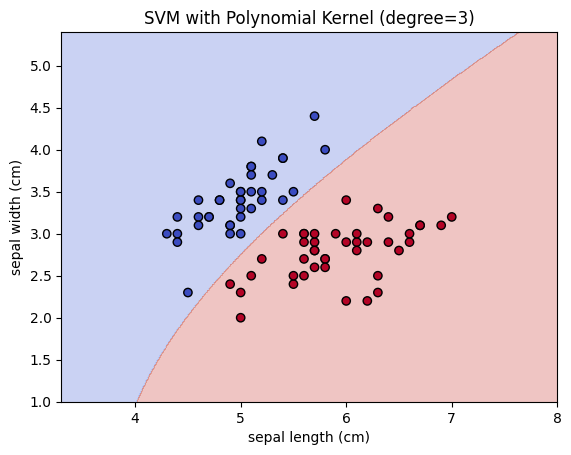

In [3]:
# Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

idx = y != 2
X = X[idx]
y = y[idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_poly = SVC(kernel='poly', degree=3, coef0=1, C=1.0)
svm_poly.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.show()

In [4]:
#  Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
X = newsgroups.data
y = newsgroups.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Multinomial Naïve Bayes on 20 Newsgroups: {accuracy:.2f}")

Accuracy of Multinomial Naïve Bayes on 20 Newsgroups: 0.85


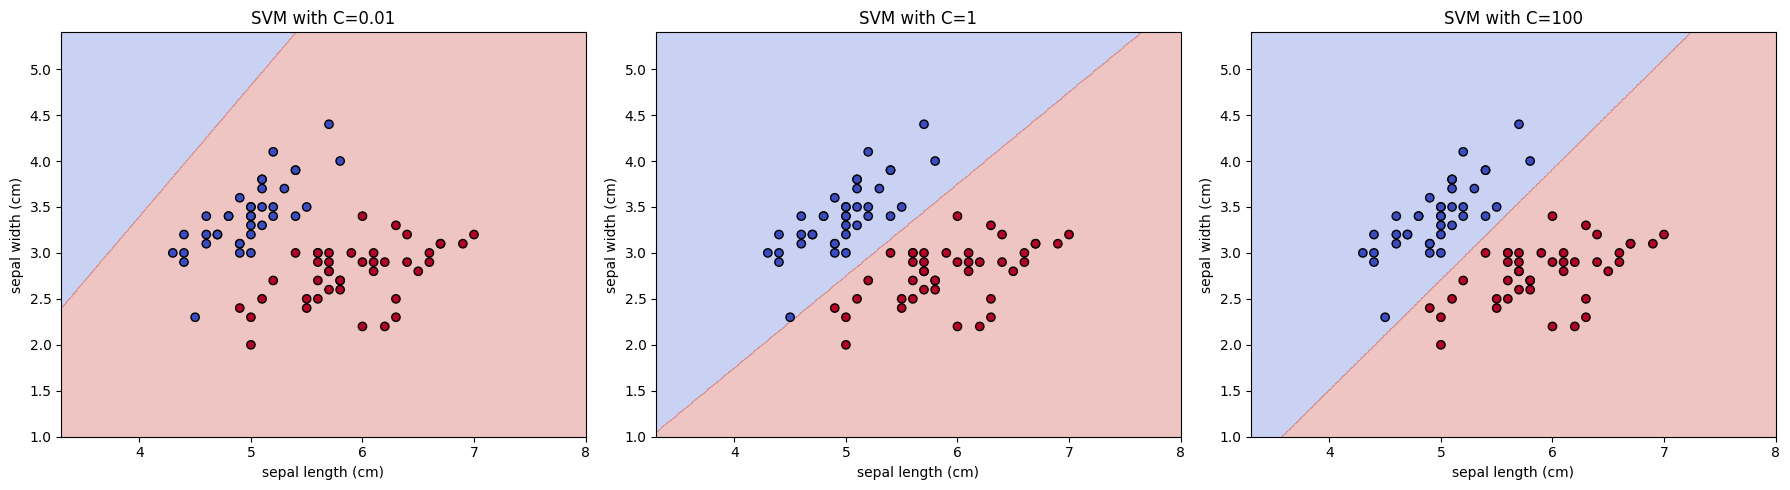

In [5]:
# Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

idx = y != 2
X = X[idx]
y = y[idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = [0.01, 1, 100]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

for ax, C in zip(axes, C_values):
    svm = SVC(C=C, kernel='linear')
    svm.fit(X_train, y_train)
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_title(f"SVM with C={C}")
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])

plt.tight_layout()
plt.show()

In [6]:
# Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Accuracy of best SVM model: {accuracy:.2f}")

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of best SVM model: 1.00


In [7]:
# Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_default = SVC()
svm_default.fit(X_train, y_train)
y_pred_default = svm_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

svm_weighted = SVC(class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

print(f"Accuracy without class weighting: {acc_default:.2f}")
print(f"Accuracy with class weighting: {acc_weighted:.2f}")

print("\nClassification report without class weighting:")
print(classification_report(y_test, y_pred_default))

print("Classification report with class weighting:")
print(classification_report(y_test, y_pred_weighted))

Accuracy without class weighting: 0.94
Accuracy with class weighting: 0.92

Classification report without class weighting:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       185
           1       0.67      0.53      0.59        15

    accuracy                           0.94       200
   macro avg       0.81      0.76      0.78       200
weighted avg       0.94      0.94      0.94       200

Classification report with class weighting:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       185
           1       0.45      0.60      0.51        15

    accuracy                           0.92       200
   macro avg       0.71      0.77      0.73       200
weighted avg       0.93      0.92      0.92       200



In [8]:
# Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# For demonstration: Use 2 categories as spam and ham proxies
categories = ['rec.autos', 'talk.politics.misc']  # pretend 'talk.politics.misc' is spam

data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.98
                    precision    recall  f1-score   support

         rec.autos       0.97      1.00      0.99       198
talk.politics.misc       1.00      0.96      0.98       155

          accuracy                           0.98       353
         macro avg       0.99      0.98      0.98       353
      weighted avg       0.98      0.98      0.98       353



In [9]:
# Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"SVM Accuracy: {acc_svm:.2f}")
print(f"Naïve Bayes Accuracy: {acc_nb:.2f}")

SVM Accuracy: 1.00
Naïve Bayes Accuracy: 1.00


In [10]:
#  Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc_without_fs = accuracy_score(y_test, y_pred)

selector = SelectKBest(score_func=chi2, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_fs = GaussianNB()
nb_fs.fit(X_train_selected, y_train)
y_pred_fs = nb_fs.predict(X_test_selected)
acc_with_fs = accuracy_score(y_test, y_pred_fs)

print(f"Accuracy without feature selection: {acc_without_fs:.2f}")
print(f"Accuracy with feature selection: {acc_with_fs:.2f}")

Accuracy without feature selection: 1.00
Accuracy with feature selection: 1.00


In [11]:
#  Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

average_accuracy = np.mean(accuracies)
print(f"Average accuracy with Stratified K-Fold CV: {average_accuracy:.2f}")

Average accuracy with Stratified K-Fold CV: 0.97


In [12]:
# Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

priors_list = [
    None,
    [0.2, 0.5, 0.3],
    [0.5, 0.3, 0.2]
]

for priors in priors_list:
    clf = GaussianNB(priors=priors)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Priors: {priors} -> Accuracy: {acc:.2f}")

Priors: None -> Accuracy: 1.00
Priors: [0.2, 0.5, 0.3] -> Accuracy: 1.00
Priors: [0.5, 0.3, 0.2] -> Accuracy: 1.00


In [13]:
# Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [14]:
# Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_prob = nb.predict_proba(X_test)

loss = log_loss(y_test, y_prob)
print(f"Log Loss: {loss:.4f}")

Log Loss: 0.0263


In [16]:
#  Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")

Mean Absolute Error: 0.860


In [17]:
# Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           random_state=42, weights=[0.7, 0.3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_prob = nb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")

ROC-AUC Score: 0.874


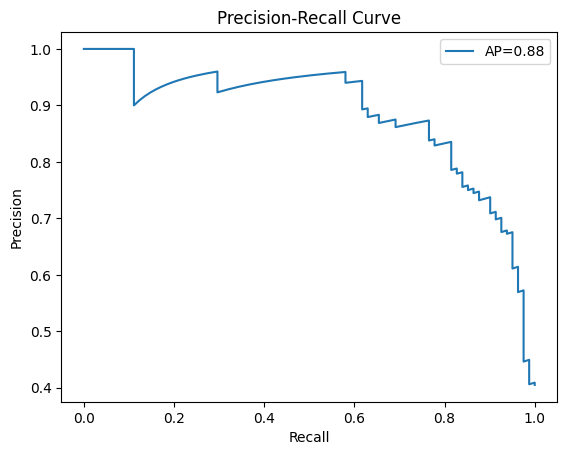

In [18]:
#  Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           random_state=42, weights=[0.6, 0.4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(probability=True)
svm.fit(X_train, y_train)

y_scores = svm.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.plot(recall, precision, label=f'AP={avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()